In [30]:
install.packages(c("readxl", "dplyr"))
install.packages("cowplot")
install.packages("here")

library(readxl)
library(dplyr)
library(ggplot2)
library(cowplot)
library(here)


Warning message:
"packages 'readxl', 'dplyr' are in use and will not be installed"
Warning message:
"package 'cowplot' is in use and will not be installed"
Warning message:
"package 'here' is in use and will not be installed"


In [31]:
# Define the file path
file_path <- here("parameters_extracted_python_graphs.xlsx")

# Load the dataset
dataset <- read_excel(file_path)

# Display the first few rows to check the data
head(dataset)

Broader Driver Category,Comparison,Driver,Type of Association Measure,Association,Lower Bound of 95%CI,Upper Bound of 95%CI,SE,SD,P-Value,Countries Assessed,Reference
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Innovation,Recommended vs Not Recommended,Innovation,OR,0.30640000000000001,0.0487000,1.930300,NA,NA,0.60189999999999999,Wales (UK),"Linley & Hughes, 2012"
Innovation,Positive vs Negative,Innovation,OR,0.91900000000000004,NA,NA,0.574,NA,NS,"CANADA-(INESSS), CANADA-(CADTH) Scotland, UK, France","Mills, 2023"
Innovation,Recommended vs Not Recommended,Innovation,OR,1.7010000000000001,0.6560000,4.411100,NA,NA,NS,UK,"H. Dakin, Devlin, et al., 2015"
Innovation,Recommended vs Not Recommended,Innovation,RRR,0.71399999999999997,NA,NA,0.339,NA,NS,"Australia, Canada, England, France, Germany, Scotland, Sweden","Kanavos et al., 2023"
New indication,Recommended vs Not Recommended,New indication,OR,1.5589304856219153,0.2508249,9.689085,NA,NA,NS,Australia,"Haque et al., 2023"
New Indication,Recommended vs not Recommended,New Indication,OR,2.9411764705882351,1.5873016,5.555556,NA,NA,1E-3,Australia,"Chim et al., 2010"


In [32]:
# Convert necessary columns to numeric
numeric_columns <- c("Association", "Lower Bound of 95%CI", "Upper Bound of 95%CI", "P-Value")

# Use mutate to convert and handle any non-numeric values by coercing them to NA
dataset <- dataset %>%
  mutate(across(all_of(numeric_columns), ~ as.numeric(as.character(.))))

# Check the updated dataset
head(dataset)  # View the first few rows

Warning message:
"There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(all_of(numeric_columns), ~as.numeric(as.character(.)))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning."


Broader Driver Category,Comparison,Driver,Type of Association Measure,Association,Lower Bound of 95%CI,Upper Bound of 95%CI,SE,SD,P-Value,Countries Assessed,Reference
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Innovation,Recommended vs Not Recommended,Innovation,OR,0.306400,0.0487000,1.930300,NA,NA,0.6019,Wales (UK),"Linley & Hughes, 2012"
Innovation,Positive vs Negative,Innovation,OR,0.919000,NA,NA,0.574,NA,NA,"CANADA-(INESSS), CANADA-(CADTH) Scotland, UK, France","Mills, 2023"
Innovation,Recommended vs Not Recommended,Innovation,OR,1.701000,0.6560000,4.411100,NA,NA,NA,UK,"H. Dakin, Devlin, et al., 2015"
Innovation,Recommended vs Not Recommended,Innovation,RRR,0.714000,NA,NA,0.339,NA,NA,"Australia, Canada, England, France, Germany, Scotland, Sweden","Kanavos et al., 2023"
New indication,Recommended vs Not Recommended,New indication,OR,1.558930,0.2508249,9.689085,NA,NA,NA,Australia,"Haque et al., 2023"
New Indication,Recommended vs not Recommended,New Indication,OR,2.941176,1.5873016,5.555556,NA,NA,0.0010,Australia,"Chim et al., 2010"


ICER PLOT

In [33]:
# Filter dataset for "ICER (10K int$ / QALY)" and keep only OR or RRR
icer_data <- dataset %>%
  filter(
    `Broader Driver Category` == "ICER (10K int$ / QALY)" & 
    `Type of Association Measure` %in% c("OR", "RRR")
  )

# Preview the filtered dataset
icer_data


Broader Driver Category,Comparison,Driver,Type of Association Measure,Association,Lower Bound of 95%CI,Upper Bound of 95%CI,SE,SD,P-Value,Countries Assessed,Reference
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ICER (10K int$ / QALY),Approved Reimbursement vs Declined Reimbursement,"ICER (per $10,000 / QALY)",OR,0.920000000,0.8600000000,0.98000000,NA,NA,0.050,Norway,"Tranvåg et al., 2022"
ICER (10K int$ / QALY),Recommended vs Not Recommended,ICER,OR,0.578316206,0.4516063922,0.74522307,NA,NA,0.050,UK,"H. Dakin, Devlin, et al., 2015"
ICER (10K int$ / QALY),Recommended vs Not Recommended (reversed),ICER,RRR,0.542886511,0.7446093876,0.39860149,NA,NA,0.009,UK,"Cerri, Knapp, & Fernandez, 2014b"
ICER (10K int$ / QALY),Reimbursed vs not Reimbursed,ICER,OR,0.268573780,0.0924848595,0.78116814,NA,NA,0.050,South Korea,"Bae et al., 2018"
ICER (10K int$ / QALY),Positive vs Negative,ICER,OR,0.497549177,0.3534155527,0.70046488,NA,NA,0.050,Ireland,"Schmitz et al., 2016"
ICER (10K int$ / QALY),Reimbursement vs not Reimbursement,ICER – Cost / QALY,OR,0.917811775,0.8687922640,0.96959709,0.8515305,0.9653351,0.050,Sweden,"Strand et al., 2022"
ICER (10K int$ / QALY),Recommended vs Not Recommended,"ICER – COST PER QALY (£, thousands)",OR,0.760323461,0.6902983956,0.83833868,NA,NA,0.050,UK,"Mauskopf et al., 2013"
ICER (10K int$ / QALY),Approved Reimbursement vs Declined Reimbursement,ICER = COST / QALY,OR,0.532422426,0.3740760391,0.75779684,NA,NA,0.010,Sweden,"Svensson et al., 2015"
ICER (10K int$ / QALY),Recommended vs not Recommended,ICER = COST / QALY,OR,0.002381569,0.0001433585,0.03464347,NA,NA,0.010,Australia,"A. Harris et al., 2016"


In [34]:
# Sort the dataset by `Association`
icer_data <- icer_data %>% arrange(Association)

# View the dataset
icer_data

Broader Driver Category,Comparison,Driver,Type of Association Measure,Association,Lower Bound of 95%CI,Upper Bound of 95%CI,SE,SD,P-Value,Countries Assessed,Reference
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ICER (10K int$ / QALY),Recommended vs not Recommended,ICER = COST / QALY,OR,0.002381569,0.0001433585,0.03464347,NA,NA,0.010,Australia,"A. Harris et al., 2016"
ICER (10K int$ / QALY),Reimbursed vs not Reimbursed,ICER,OR,0.268573780,0.0924848595,0.78116814,NA,NA,0.050,South Korea,"Bae et al., 2018"
ICER (10K int$ / QALY),Positive vs Negative,ICER,OR,0.497549177,0.3534155527,0.70046488,NA,NA,0.050,Ireland,"Schmitz et al., 2016"
ICER (10K int$ / QALY),Approved Reimbursement vs Declined Reimbursement,ICER = COST / QALY,OR,0.532422426,0.3740760391,0.75779684,NA,NA,0.010,Sweden,"Svensson et al., 2015"
ICER (10K int$ / QALY),Recommended vs Not Recommended (reversed),ICER,RRR,0.542886511,0.7446093876,0.39860149,NA,NA,0.009,UK,"Cerri, Knapp, & Fernandez, 2014b"
ICER (10K int$ / QALY),Recommended vs Not Recommended,ICER,OR,0.578316206,0.4516063922,0.74522307,NA,NA,0.050,UK,"H. Dakin, Devlin, et al., 2015"
ICER (10K int$ / QALY),Recommended vs Not Recommended,"ICER – COST PER QALY (£, thousands)",OR,0.760323461,0.6902983956,0.83833868,NA,NA,0.050,UK,"Mauskopf et al., 2013"
ICER (10K int$ / QALY),Reimbursement vs not Reimbursement,ICER – Cost / QALY,OR,0.917811775,0.8687922640,0.96959709,0.8515305,0.9653351,0.050,Sweden,"Strand et al., 2022"
ICER (10K int$ / QALY),Approved Reimbursement vs Declined Reimbursement,"ICER (per $10,000 / QALY)",OR,0.920000000,0.8600000000,0.98000000,NA,NA,0.050,Norway,"Tranvåg et al., 2022"


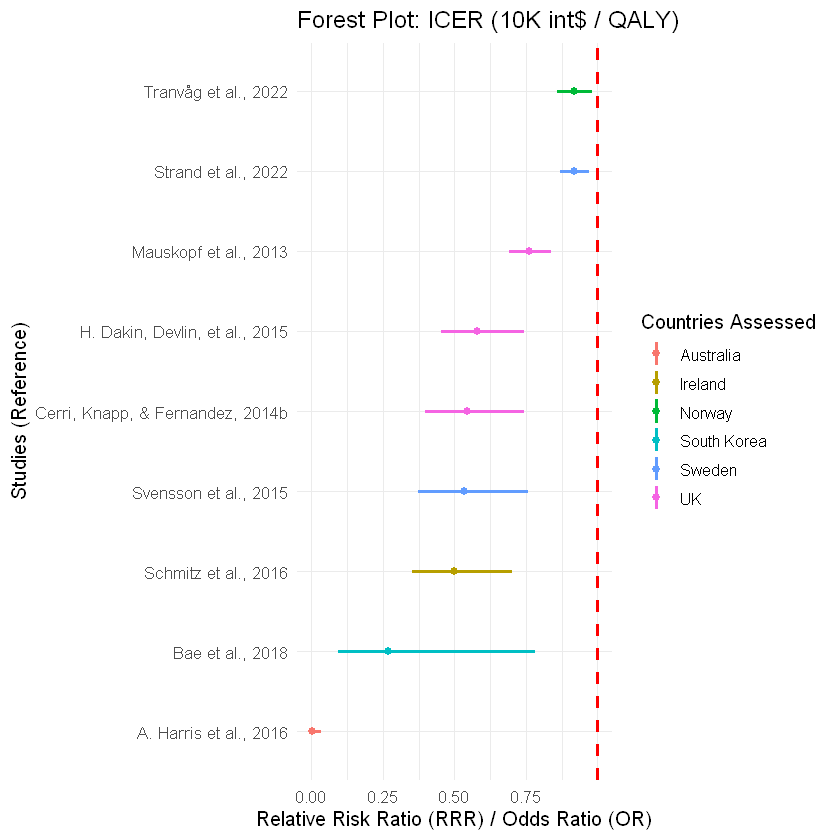

In [35]:
#`Reference` is treated as a factor and `Association` is numeric
icer_data$Reference <- factor(icer_data$Reference, levels = icer_data$Reference)
icer_data$Association <- as.numeric(icer_data$Association)  # Convert to numeric

#Create the forest plot
ggplot(icer_data, aes(x = Reference, y = Association)) +
  # Add confidence interval lines
  geom_linerange(aes(ymin = `Lower Bound of 95%CI`, ymax = `Upper Bound of 95%CI`, color = `Countries Assessed`), 
                 position = position_dodge(width = 0.5), 
                 size = 1.) +  #line thickness
  #Add points
  geom_point(aes(color = `Countries Assessed`), 
             position = position_dodge(width = 0.25), 
             size = 2) +  #dot size
  # Add line of no effect
  geom_hline(yintercept = 1, linetype = "dashed", color = "red", size = 1) +  # thickness
  # Flip coordinates for horizontal plot
  coord_flip() +
  # Labels and theme
  labs(
    title = "Forest Plot: ICER (10K int$ / QALY)",
    x = "Studies (Reference)",
    y = "Relative Risk Ratio (RRR) / Odds Ratio (OR)"
  ) +
  scale_y_continuous(breaks = seq(0, max(icer_data$Association, na.rm = TRUE), by = 0.25),  # Adjust breaks
                     labels = scales::number_format(accuracy = 0.01)) +  # Control decimal places
  theme_minimal(base_size = 12) +
  theme(
    axis.text.y = element_text(size = 10),  #study names text size
    axis.title.y = element_text(size = 12)
  )


In [36]:
# Add RRR/OR next to Reference with a "-" separator
icer_data$Reference <- factor(paste0(icer_data$Reference, " - ", icer_data$`Type of Association Measure`),
                              levels = unique(paste0(icer_data$Reference, " - ", icer_data$`Type of Association Measure`)))


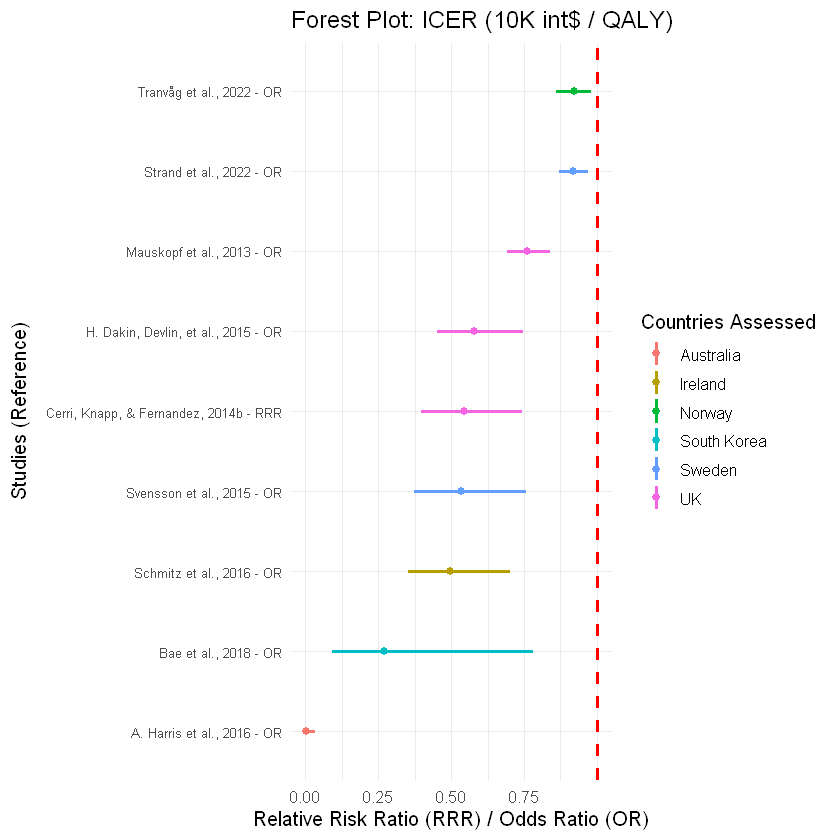

In [37]:
#`Reference` is treated as a factor and `Association` is numeric
icer_data$Reference <- factor(icer_data$Reference, levels = icer_data$Reference)
icer_data$Association <- as.numeric(icer_data$Association)  # Convert to numeric

#Create the forest plot
ggplot(icer_data, aes(x = Reference, y = Association)) +
  # Add confidence interval lines
  geom_linerange(aes(ymin = `Lower Bound of 95%CI`, ymax = `Upper Bound of 95%CI`, color = `Countries Assessed`), 
                 position = position_dodge(width = 0.5), 
                 size = 1.) +  #line thickness
  #Add points
  geom_point(aes(color = `Countries Assessed`), 
             position = position_dodge(width = 0.25), 
             size = 2) +  #dot size
  # Add line of no effect
  geom_hline(yintercept = 1, linetype = "dashed", color = "red", size = 1) +  # thickness
  # Flip coordinates for horizontal plot
  coord_flip() +
  # Labels and theme
  labs(
    title = "Forest Plot: ICER (10K int$ / QALY)",
    x = "Studies (Reference)",
    y = "Relative Risk Ratio (RRR) / Odds Ratio (OR)"
  ) +
  scale_y_continuous(breaks = seq(0, max(icer_data$Association, na.rm = TRUE), by = 0.25),  # Adjust breaks
                     labels = scales::number_format(accuracy = 0.01)) +  # Control decimal places
  theme_minimal(base_size = 12) +
  theme(
    axis.text.y = element_text(size = 8),  #study names text size
    axis.title.y = element_text(size = 12)
  )


CLINICAL UNCERTAINTIES

In [38]:
# Filter the dataset for "Clinical Uncertainties" and include only OR or RRR
clinical_data <- dataset %>%
  filter(
    `Broader Driver Category` == "Clinical Uncertainties" & 
    `Type of Association Measure` %in% c("OR", "RRR")
  ) %>%
  arrange(Association)

# Add RRR/OR next to Reference
clinical_data$Reference <- factor(paste0(clinical_data$Reference, " - ", clinical_data$`Type of Association Measure`),
                                  levels = unique(paste0(clinical_data$Reference, " - ", clinical_data$`Type of Association Measure`)))

# Ensure `Association` is numeric
clinical_data$Association <- as.numeric(clinical_data$Association)


In [39]:
# Forest plot with labels but no legend
forest_plot_with_labels <- ggplot(clinical_data, aes(x = Reference, y = Association)) +
  # Add confidence interval lines
  geom_linerange(aes(ymin = `Lower Bound of 95%CI`, ymax = `Upper Bound of 95%CI`, color = `Countries Assessed`), 
                 position = position_dodge(width = 0.5), 
                 size = 1) +  # Line thickness
  # Add points
  geom_point(aes(color = `Countries Assessed`), 
             position = position_dodge(width = 0.25), 
             size = 2) +  # Dot size
  # Add line of no effect
  geom_hline(yintercept = 1, linetype = "dashed", color = "red", size = 1) +  # Thickness
  # Flip coordinates for horizontal plot
  coord_flip() +
  # Labels and theme
  labs(
    title = "Forest Plot: Clinical Uncertainties",
    x = "Studies (Reference)",
    y = "Relative Risk Ratio (RRR) / Odds Ratio (OR)",
    color = NULL  # Remove legend title
  ) +
  scale_y_continuous(
    limits = c(0, 1),  # Fixed scale
    breaks = seq(0, 1, by = 0.1),  # Adjust tick marks
    labels = scales::number_format(accuracy = 0.01)  # Control decimal places
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "none",  # Remove the legend
    axis.text.y = element_text(size = 8),  # Study names text size
    axis.title.y = element_text(size = 12),
    plot.margin = margin(5, 5, 5, 5)  # Add some padding
  )


In [40]:


# Create a dummy plot to extract the legend
legend_plot <- ggplot(clinical_data, aes(x = Reference, y = Association, color = `Countries Assessed`)) +
  geom_point() +
  labs(color = "Countries Assessed") +
  theme_minimal(base_size = 12) +
  theme(
    legend.key.size = unit(1, "cm"),  # Adjust legend key size
    legend.text = element_text(size = 10)  # Adjust legend text size
  )

# Extract the legend
legend <- get_legend(legend_plot)


Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_segment()`)."


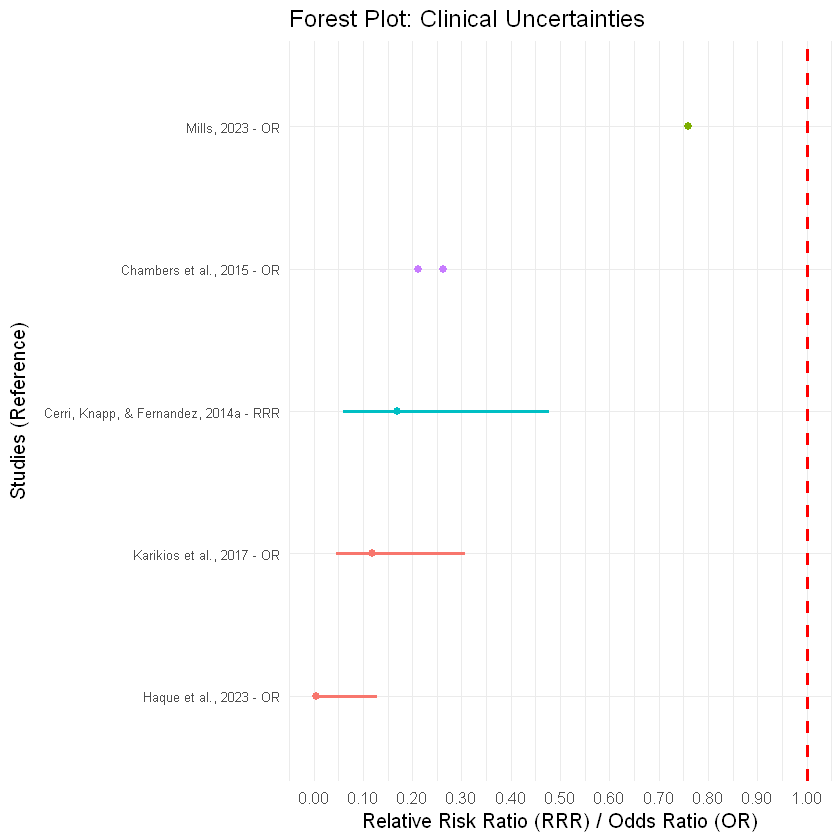

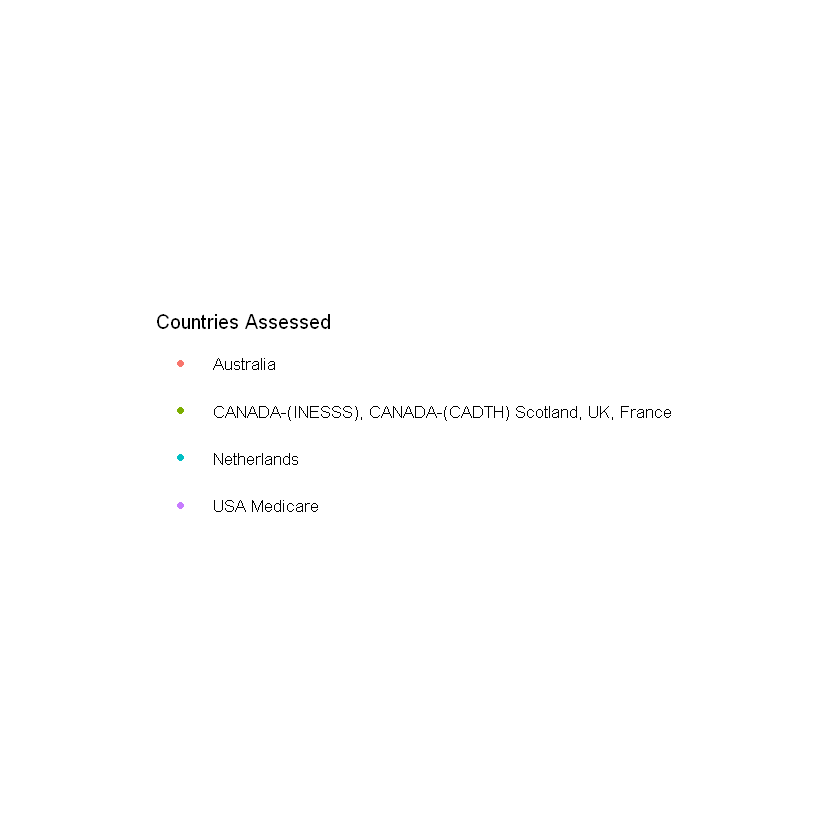

In [41]:
# Print the forest plot with labels
print(forest_plot_with_labels)

# Print the legend separately
plot_grid(legend, ncol = 1)


ONCOLOGY

In [42]:
# Filter the dataset for "Clinical Uncertainties" and include only OR or RRR
clinical_data <- dataset %>%
  filter(
    `Broader Driver Category` == "Oncology" & 
    `Type of Association Measure` %in% c("OR", "RRR")
  ) %>%
  arrange(Association)

# Add RRR/OR next to Reference
clinical_data$Reference <- factor(paste0(clinical_data$Reference, " - ", clinical_data$`Type of Association Measure`),
                                  levels = unique(paste0(clinical_data$Reference, " - ", clinical_data$`Type of Association Measure`)))

# Ensure `Association` is numeric
clinical_data$Association <- as.numeric(clinical_data$Association)

In [43]:
# Filter the dataset for "Oncology" and include only OR or RRR
oncology_data <- dataset %>%
    filter(
        `Broader Driver Category` == "Oncology" & 
        `Type of Association Measure` %in% c("OR", "RRR")
    ) %>%
    arrange(Association)

# Add RRR/OR next to Reference
oncology_data$Reference <- factor(paste0(oncology_data$Reference, " - ", oncology_data$`Type of Association Measure`),
                                                                    levels = unique(paste0(oncology_data$Reference, " - ", oncology_data$`Type of Association Measure`)))

# Ensure `Association` is numeric
oncology_data$Association <- as.numeric(oncology_data$Association)

# Forest plot with labels but no legend
forest_plot_with_labels <- ggplot(oncology_data, aes(x = Reference, y = Association)) +
    # Add confidence interval lines
    geom_linerange(aes(ymin = `Lower Bound of 95%CI`, ymax = `Upper Bound of 95%CI`, color = `Countries Assessed`), 
                                 position = position_dodge(width = 0.5), 
                                 size = 1) +  # Line thickness
    # Add points
    geom_point(aes(color = `Countries Assessed`), 
                         position = position_dodge(width = 0.25), 
                         size = 2) +  # Dot size
    # Add line of no effect
    geom_hline(yintercept = 1, linetype = "dashed", color = "red", size = 1) +  # Thickness
    # Flip coordinates for horizontal plot
    coord_flip() +
    # Labels and theme
    labs(
        title = "Forest Plot: Oncology",
        x = "Studies (Reference)",
        y = "Relative Risk Ratio (RRR) / Odds Ratio (OR)",
        color = NULL  # Remove legend title
    ) +
    scale_y_continuous(
        limits = c(0, 9),  # Fixed scale
        breaks = seq(0, 9, by = 0.5),  # Adjust tick marks
        labels = scales::number_format(accuracy = 0.1)  # Control decimal places
    ) +
    theme_minimal(base_size = 12) +
    theme(
        legend.position = "none",  # Remove the legend
        axis.text.y = element_text(size = 8),  # Study names text size
        axis.title.y = element_text(size = 12),
        plot.margin = margin(5, 5, 5, 5)  # Add some padding
    )


In [44]:
# Create a dummy plot to extract the legend for oncology data
legend_plot <- ggplot(oncology_data, aes(x = Reference, y = Association, color = `Countries Assessed`)) +
    geom_point() +
    labs(color = "Countries Assessed") +
    theme_minimal(base_size = 12) +
    theme(
        legend.key.size = unit(1, "cm"),  # Adjust legend key size
        legend.text = element_text(size = 10)  # Adjust legend text size
    )

# Extract the legend
legend <- get_legend(legend_plot)


Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_segment()`)."


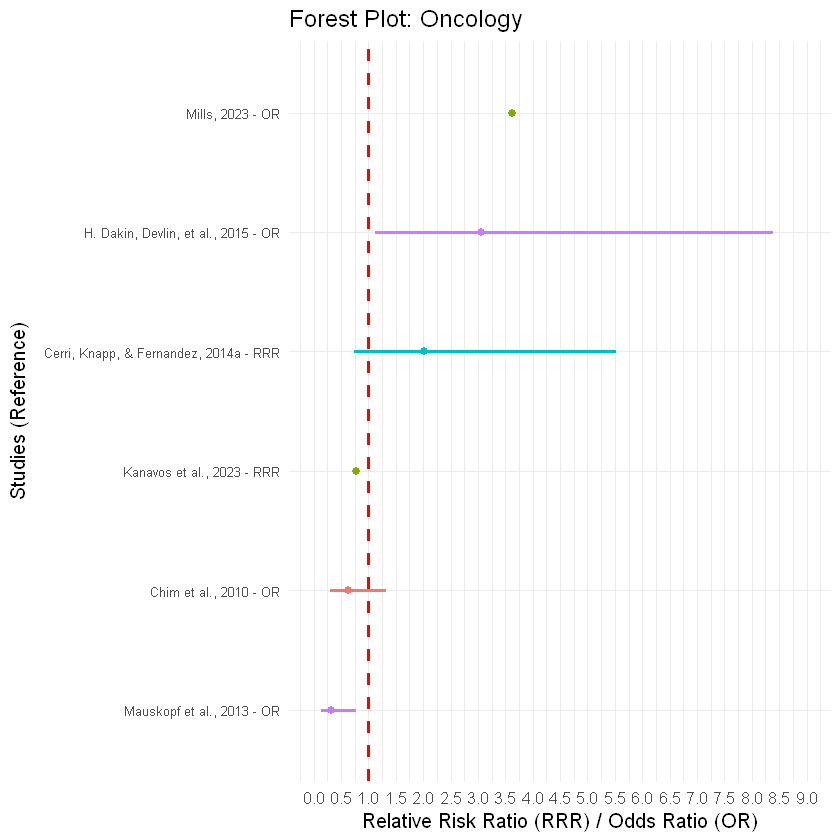

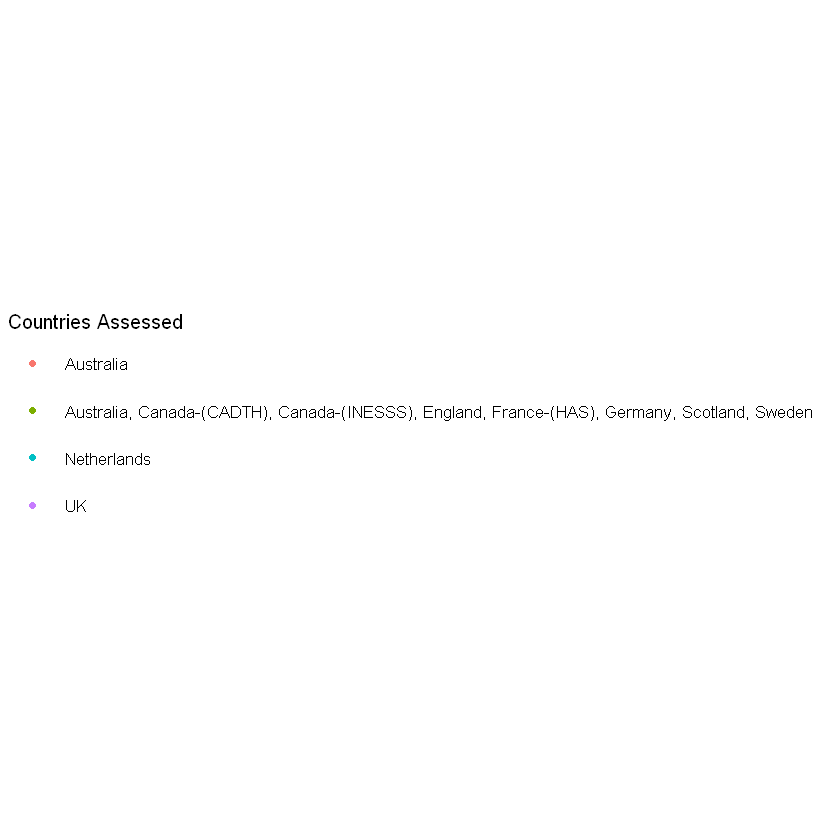

In [45]:
# Print the forest plot with labels
print(forest_plot_with_labels)

# Print the legend separately
plot_grid(legend, ncol = 1)


ORPHAN DRUG

Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_segment()`)."


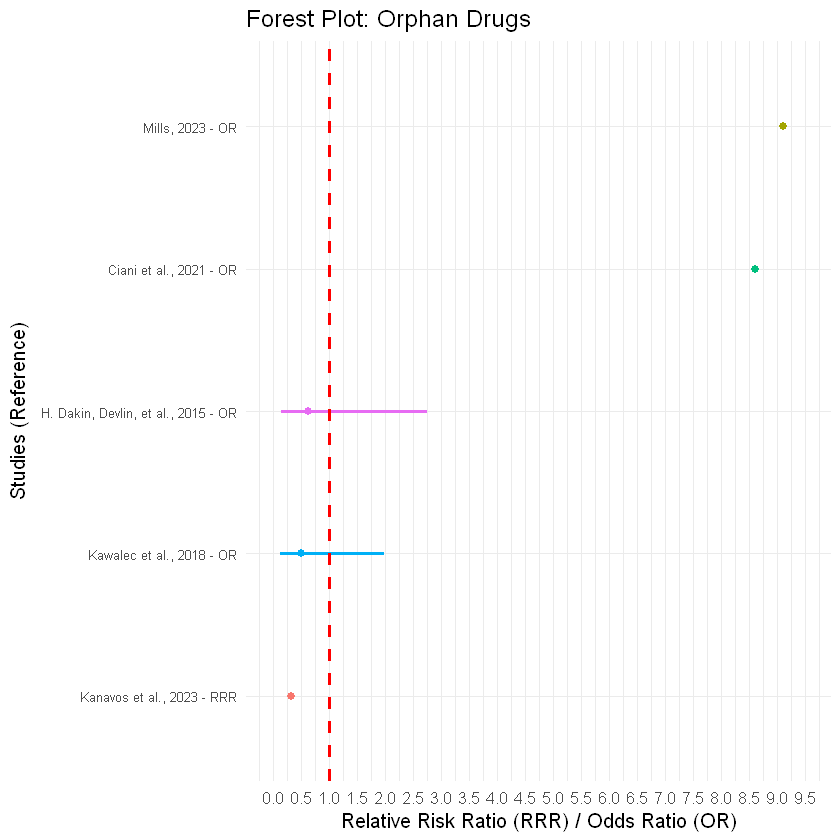

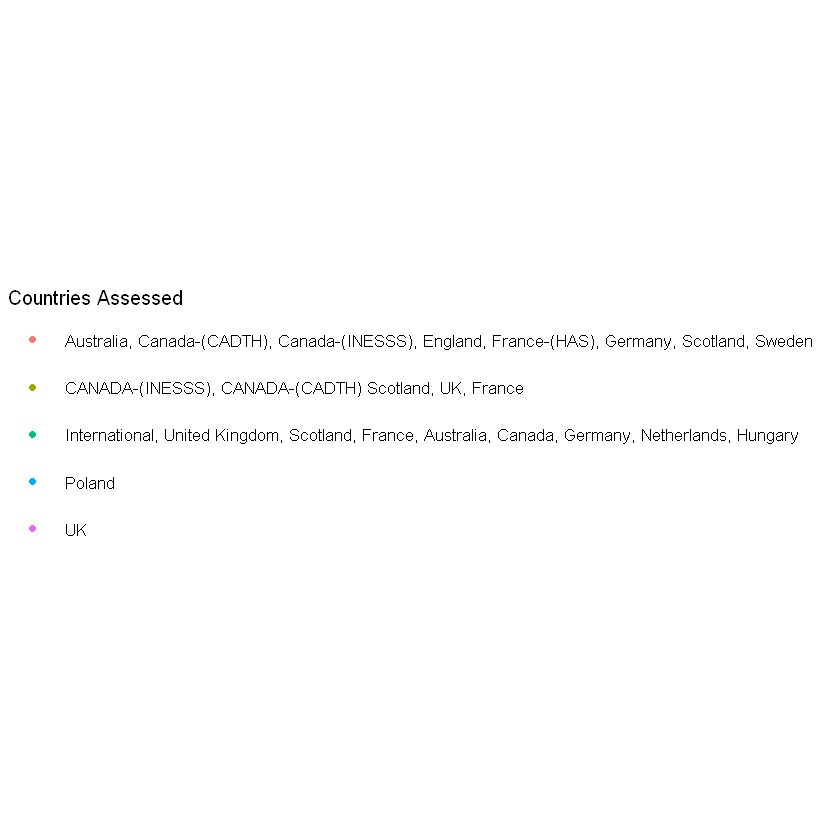

In [46]:
# Filter the dataset for "Orphan Drugs" and include only OR or RRR
orphan_drug_data <- dataset %>%
  filter(
    `Broader Driver Category` == "Orphan Drug" & 
    `Type of Association Measure` %in% c("OR", "RRR")
  ) %>%
  arrange(Association)

# Add RRR/OR next to Reference
orphan_drug_data$Reference <- factor(paste0(orphan_drug_data$Reference, " - ", orphan_drug_data$`Type of Association Measure`),
                                     levels = unique(paste0(orphan_drug_data$Reference, " - ", orphan_drug_data$`Type of Association Measure`)))

# Ensure `Association` is numeric
orphan_drug_data$Association <- as.numeric(orphan_drug_data$Association)

# Forest plot with labels but no legend
forest_plot_with_labels <- ggplot(orphan_drug_data, aes(x = Reference, y = Association)) +
    # Add confidence interval lines
    geom_linerange(aes(ymin = `Lower Bound of 95%CI`, ymax = `Upper Bound of 95%CI`, color = `Countries Assessed`), 
                   position = position_dodge(width = 0.5), 
                   size = 1) +  # Line thickness
    # Add points
    geom_point(aes(color = `Countries Assessed`), 
               position = position_dodge(width = 0.25), 
               size = 2) +  # Dot size
    # Add line of no effect
    geom_hline(yintercept = 1, linetype = "dashed", color = "red", size = 1) +  # Thickness
    # Flip coordinates for horizontal plot
    coord_flip() +
    # Labels and theme
    labs(
        title = "Forest Plot: Orphan Drugs",
        x = "Studies (Reference)",
        y = "Relative Risk Ratio (RRR) / Odds Ratio (OR)",
        color = NULL  # Remove legend title
    ) +
    scale_y_continuous(
        limits = c(0, 9.5),  # Fixed scale
        breaks = seq(0, 9.5, by = 0.5),  # Adjust tick marks
        labels = scales::number_format(accuracy = 0.1)  # Control decimal places
    ) +
    theme_minimal(base_size = 12) +
    theme(
        legend.position = "none",  # Remove the legend
        axis.text.y = element_text(size = 8),  # Study names text size
        axis.title.y = element_text(size = 12),
        plot.margin = margin(5, 5, 5, 5)  # Add some padding
    )

# Create a dummy plot to extract the legend for orphan drug data
legend_plot <- ggplot(orphan_drug_data, aes(x = Reference, y = Association, color = `Countries Assessed`)) +
    geom_point() +
    labs(color = "Countries Assessed") +
    theme_minimal(base_size = 12) +
    theme(
        legend.key.size = unit(1, "cm"),  # Adjust legend key size
        legend.text = element_text(size = 10)  # Adjust legend text size
    )

# Extract the legend
legend <- get_legend(legend_plot)

# Print the forest plot with labels
print(forest_plot_with_labels)

# Print the legend separately
plot_grid(legend, ncol = 1)


PATIENT PARTICIPATION

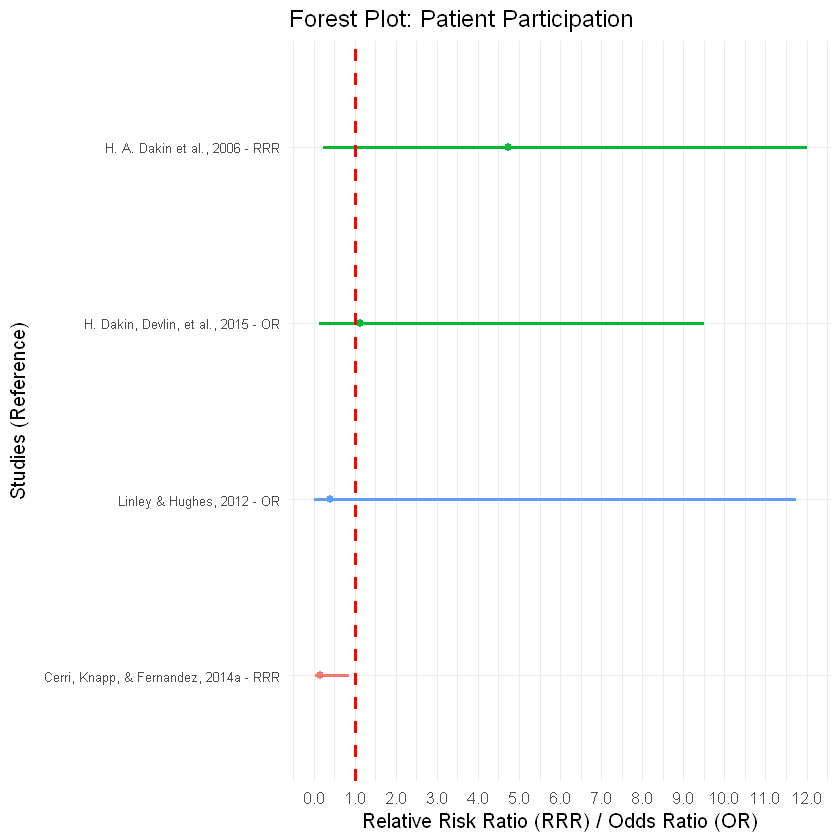

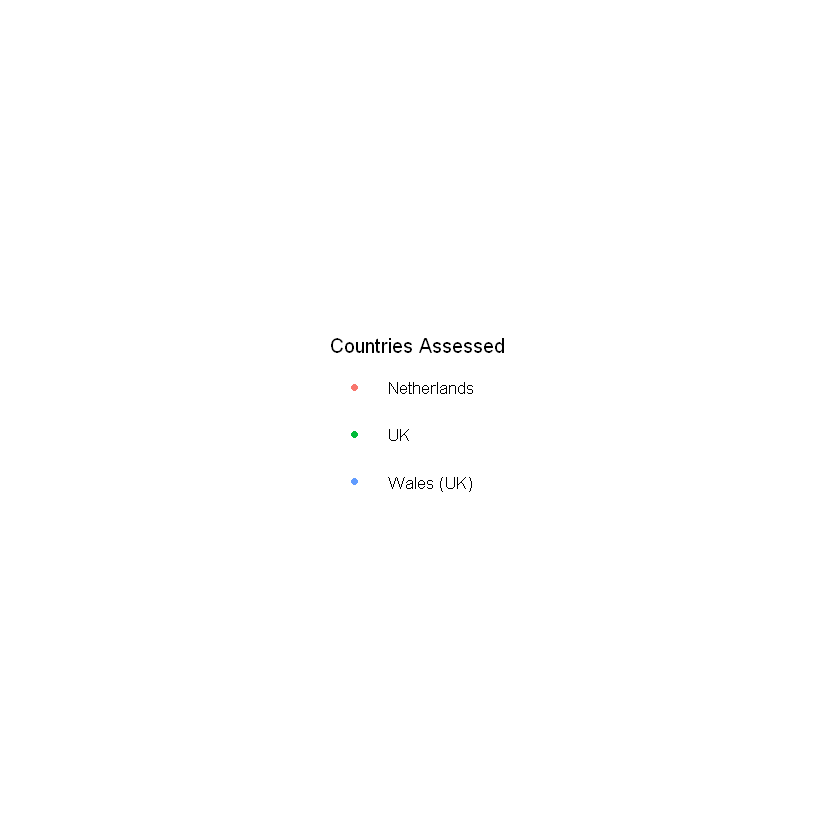

In [47]:
# Filter the dataset for "Patient Participation" and include only OR or RRR
patient_participation_data <- dataset %>%
  filter(
    `Broader Driver Category` == "Patient Participation" & 
    `Type of Association Measure` %in% c("OR", "RRR")
  ) %>%
  arrange(Association)

# Add RRR/OR next to Reference
patient_participation_data$Reference <- factor(paste0(patient_participation_data$Reference, " - ", patient_participation_data$`Type of Association Measure`),
                                               levels = unique(paste0(patient_participation_data$Reference, " - ", patient_participation_data$`Type of Association Measure`)))

# Ensure `Association` is numeric
patient_participation_data$Association <- as.numeric(patient_participation_data$Association)

# Forest plot with labels but no legend
forest_plot_with_labels <- ggplot(patient_participation_data, aes(x = Reference, y = Association)) +
    # Add confidence interval lines
    geom_linerange(aes(ymin = `Lower Bound of 95%CI`, ymax = `Upper Bound of 95%CI`, color = `Countries Assessed`), 
                   position = position_dodge(width = 0.5), 
                   size = 1) +  # Line thickness
    # Add points
    geom_point(aes(color = `Countries Assessed`), 
               position = position_dodge(width = 0.25), 
               size = 2) +  # Dot size
    # Add line of no effect
    geom_hline(yintercept = 1, linetype = "dashed", color = "red", size = 1) +  # Thickness
    # Flip coordinates for horizontal plot
    coord_flip() +
    # Labels and theme
    labs(
        title = "Forest Plot: Patient Participation",
        x = "Studies (Reference)",
        y = "Relative Risk Ratio (RRR) / Odds Ratio (OR)",
        color = NULL  # Remove legend title
    ) +
    scale_y_continuous(
        limits = c(0, 12),  # Fixed scale
        breaks = seq(0, 12, by = 1),  # Adjust tick marks
        labels = scales::number_format(accuracy = 0.1)  # Control decimal places
    ) +
    theme_minimal(base_size = 12) +
    theme(
        legend.position = "none",  # Remove the legend
        axis.text.y = element_text(size = 8),  # Study names text size
        axis.title.y = element_text(size = 12),
        plot.margin = margin(5, 5, 5, 5)  # Add some padding
    )

# Create a dummy plot to extract the legend for patient participation data
legend_plot <- ggplot(patient_participation_data, aes(x = Reference, y = Association, color = `Countries Assessed`)) +
    geom_point() +
    labs(color = "Countries Assessed") +
    theme_minimal(base_size = 12) +
    theme(
        legend.key.size = unit(1, "cm"),  # Adjust legend key size
        legend.text = element_text(size = 10)  # Adjust legend text size
    )

# Extract the legend
legend <- get_legend(legend_plot)

# Print the forest plot with labels
print(forest_plot_with_labels)

# Print the legend separately
plot_grid(legend, ncol = 1)


SUPERIOR EFFICACY

In [48]:
# Filter the dataset for "Superior Efficacy" and include only OR or RRR
superior_efficacy_data <- dataset %>%
  filter(
    `Broader Driver Category` == "Superior Efficacy" & 
    `Type of Association Measure` %in% c("OR", "RRR")
  ) %>%
  arrange(Association)

  superior_efficacy_data

Broader Driver Category,Comparison,Driver,Type of Association Measure,Association,Lower Bound of 95%CI,Upper Bound of 95%CI,SE,SD,P-Value,Countries Assessed,Reference
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Superior Efficacy,Recommended vs Not Recommended,Superior efficacy,OR,1.133148,0.09292152,13.80457,NA,NA,0.9220,Australia,"Haque et al., 2023"
Superior Efficacy,Positive vs Not Positive,Superior efficacy,OR,2.247000,0.95500000,5.31200,NA,NA,0.0636,Poland,"Malinowski et al., 2016"
Superior Efficacy,Routine vs Not Recommended (reversed),Superior Efficacy,RRR,2.352941,0.12108003,45.87156,NA,NA,0.5720,UK,"H. A. Dakin et al., 2006"
Superior Efficacy,Positive vs Negative,Clinical Effectiveness (Better),OR,2.712851,0.02428831,303.00824,NA,NA,NA,UK,"Schaefer et al., 2023"
Superior Efficacy,Recommended vs Not Recommended (reversed),Superior Efficacy in RCTs,RRR,6.359820,2.43512965,16.77685,NA,NA,0.0010,Netherlands,"Cerri, Knapp, & Fernandez, 2014a"
Superior Efficacy,Recommended vs Not Recommended (reversed),Superior Efficacy in RCTs,RRR,7.463317,1.46228459,38.09184,NA,NA,0.0200,UK,"Cerri, Knapp, & Fernandez, 2014b"
Superior Efficacy,Recommended vs Rejected,Relative Efficacy – Superior to Comparator,OR,28.012000,1.96500000,399.38700,NA,NA,NA,South Korea,"Park et al., 2012"
Superior Efficacy,Recommended vs not Recommended,Relative Efficacy – Superior to Comparator,OR,41.478000,22.96300000,580.67000,NA,NA,0.0060,Belgium,"Pauwels et al., 2015"
Superior Efficacy,Positive vs Negative,Relative Efficacy – Superior to comparator,OR,45.300000,6.69000000,306.64000,NA,NA,NA,Poland,"Kawalec et al., 2018"


In [49]:
superior_efficacy_data <- superior_efficacy_data %>%
  mutate(
    Reference = if_else(
      Reference == "Schaefer et al., 2023",
      paste0(Reference, " (", `Countries Assessed`, ")"),
      Reference
    )
  )

superior_efficacy_data

Broader Driver Category,Comparison,Driver,Type of Association Measure,Association,Lower Bound of 95%CI,Upper Bound of 95%CI,SE,SD,P-Value,Countries Assessed,Reference
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Superior Efficacy,Recommended vs Not Recommended,Superior efficacy,OR,1.133148,0.09292152,13.80457,NA,NA,0.9220,Australia,"Haque et al., 2023"
Superior Efficacy,Positive vs Not Positive,Superior efficacy,OR,2.247000,0.95500000,5.31200,NA,NA,0.0636,Poland,"Malinowski et al., 2016"
Superior Efficacy,Routine vs Not Recommended (reversed),Superior Efficacy,RRR,2.352941,0.12108003,45.87156,NA,NA,0.5720,UK,"H. A. Dakin et al., 2006"
Superior Efficacy,Positive vs Negative,Clinical Effectiveness (Better),OR,2.712851,0.02428831,303.00824,NA,NA,NA,UK,"Schaefer et al., 2023 (UK)"
Superior Efficacy,Recommended vs Not Recommended (reversed),Superior Efficacy in RCTs,RRR,6.359820,2.43512965,16.77685,NA,NA,0.0010,Netherlands,"Cerri, Knapp, & Fernandez, 2014a"
Superior Efficacy,Recommended vs Not Recommended (reversed),Superior Efficacy in RCTs,RRR,7.463317,1.46228459,38.09184,NA,NA,0.0200,UK,"Cerri, Knapp, & Fernandez, 2014b"
Superior Efficacy,Recommended vs Rejected,Relative Efficacy – Superior to Comparator,OR,28.012000,1.96500000,399.38700,NA,NA,NA,South Korea,"Park et al., 2012"
Superior Efficacy,Recommended vs not Recommended,Relative Efficacy – Superior to Comparator,OR,41.478000,22.96300000,580.67000,NA,NA,0.0060,Belgium,"Pauwels et al., 2015"
Superior Efficacy,Positive vs Negative,Relative Efficacy – Superior to comparator,OR,45.300000,6.69000000,306.64000,NA,NA,NA,Poland,"Kawalec et al., 2018"


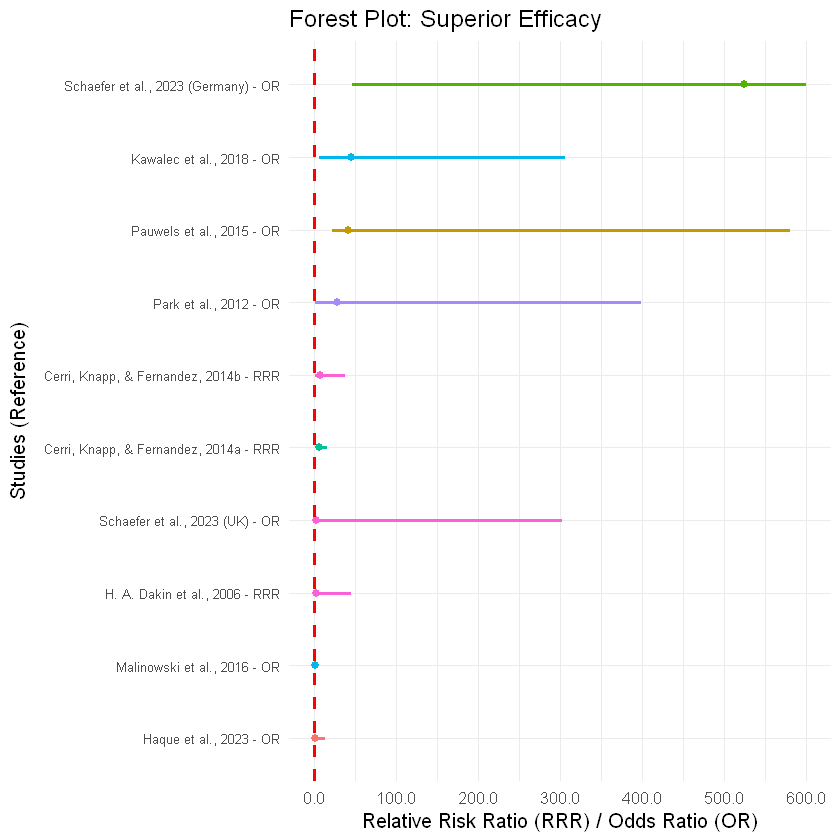

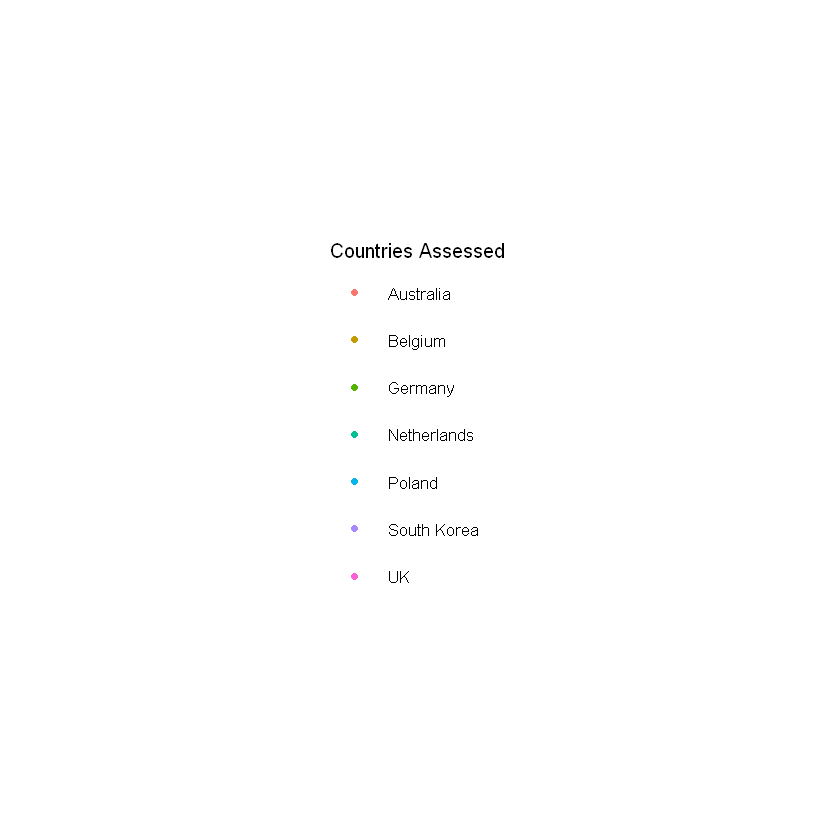

In [50]:

# Add RRR/OR next to Reference
superior_efficacy_data$Reference <- factor(paste0(superior_efficacy_data$Reference, " - ", superior_efficacy_data$`Type of Association Measure`),
                                           levels = unique(paste0(superior_efficacy_data$Reference, " - ", superior_efficacy_data$`Type of Association Measure`)))

# Ensure `Association` is numeric
superior_efficacy_data$Association <- as.numeric(superior_efficacy_data$Association)

# Forest plot with labels but no legend
forest_plot_with_labels <- ggplot(superior_efficacy_data, aes(x = Reference, y = Association)) +
    # Add confidence interval lines
    geom_linerange(aes(ymin = `Lower Bound of 95%CI`, ymax = `Upper Bound of 95%CI`, color = `Countries Assessed`), 
                   position = position_dodge(width = 0.5), 
                   size = 1) +  # Line thickness
    # Add points
    geom_point(aes(color = `Countries Assessed`), 
               position = position_dodge(width = 0.5), 
               size = 2) +  # Dot size
    # Add line of no effect
    geom_hline(yintercept = 1, linetype = "dashed", color = "red", size = 1) +  # Thickness
    # Flip coordinates for horizontal plot
    coord_flip() +
    # Labels and theme
    labs(
        title = "Forest Plot: Superior Efficacy",
        x = "Studies (Reference)",
        y = "Relative Risk Ratio (RRR) / Odds Ratio (OR)",
        color = NULL  # Remove legend title
    ) +
    scale_y_continuous(
        limits = c(0, 601),  # Fixed scale
        breaks = seq(0, 601, by = 100),  # Adjust tick marks
        labels = scales::number_format(accuracy = 0.1)  # Control decimal places
    ) +
    theme_minimal(base_size = 12) +
    theme(
        legend.position = "none",  # Remove the legend
        axis.text.y = element_text(size = 8),  # Study names text size
        axis.title.y = element_text(size = 12),
        plot.margin = margin(5, 5, 5, 5)  # Add some padding
    )

# Create a dummy plot to extract the legend for superior efficacy data
legend_plot <- ggplot(superior_efficacy_data, aes(x = Reference, y = Association, color = `Countries Assessed`)) +
    geom_point() +
    labs(color = "Countries Assessed") +
    theme_minimal(base_size = 12) +
    theme(
        legend.key.size = unit(1, "cm"),  # Adjust legend key size
        legend.text = element_text(size = 10)  # Adjust legend text size
    )

# Extract the legend
legend <- get_legend(legend_plot)

# Print the forest plot with labels
print(forest_plot_with_labels)

# Print the legend separately
plot_grid(legend, ncol = 1)

HIGH QUALITY OF EVIDENCE

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."


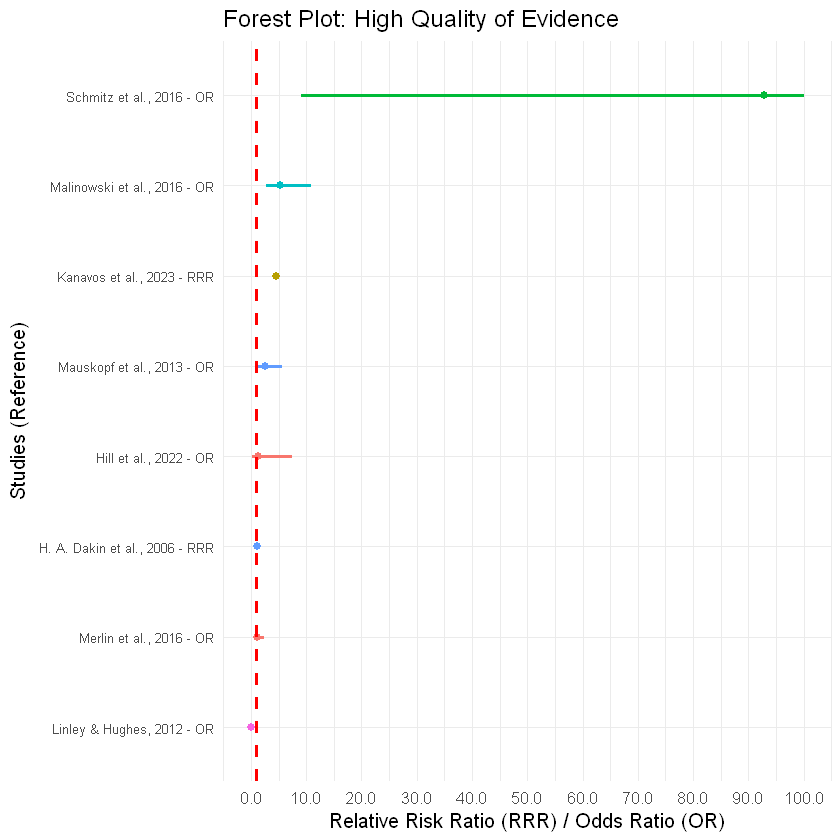

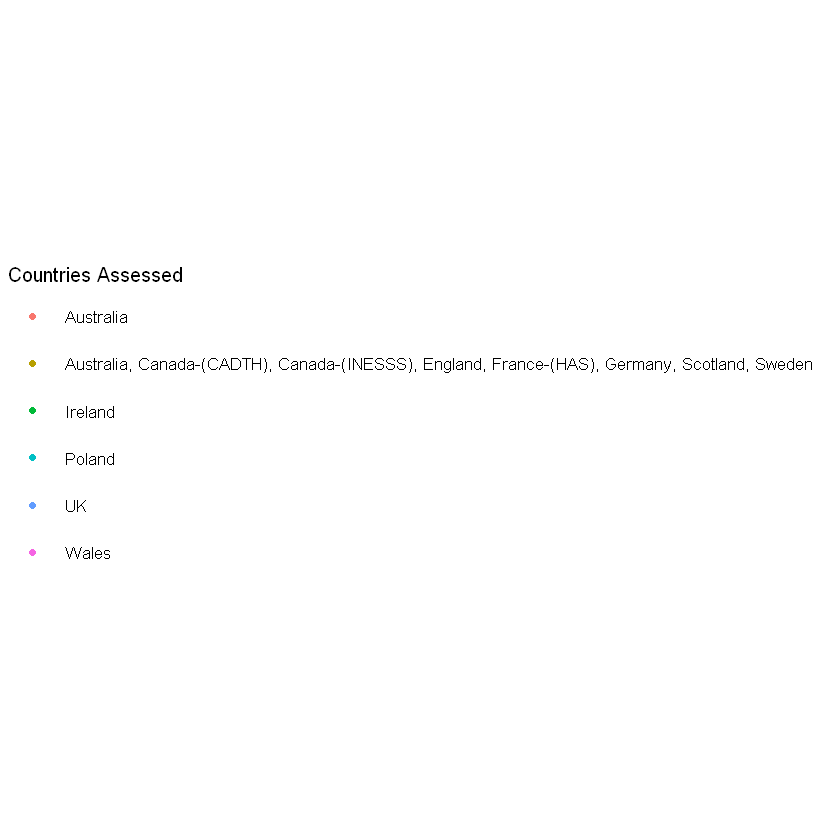

In [51]:
# Filter the dataset for "High Quality of Evidence" and include only OR or RRR
high_quality_evidence_data <- dataset %>%
  filter(
    `Broader Driver Category` == "High Quality of Evidence" & 
    `Type of Association Measure` %in% c("OR", "RRR")
  ) %>%
  arrange(Association)

# Add RRR/OR next to Reference
high_quality_evidence_data$Reference <- factor(paste0(high_quality_evidence_data$Reference, " - ", high_quality_evidence_data$`Type of Association Measure`),
                                                levels = unique(paste0(high_quality_evidence_data$Reference, " - ", high_quality_evidence_data$`Type of Association Measure`)))

# Ensure `Association` is numeric
high_quality_evidence_data$Association <- as.numeric(high_quality_evidence_data$Association)

# Forest plot with labels but no legend
forest_plot_with_labels <- ggplot(high_quality_evidence_data, aes(x = Reference, y = Association)) +
    # Add confidence interval lines
    geom_linerange(aes(ymin = `Lower Bound of 95%CI`, ymax = `Upper Bound of 95%CI`, color = `Countries Assessed`), 
                   position = position_dodge(width = 0.5), 
                   size = 1) +  # Line thickness
    # Add points
    geom_point(aes(color = `Countries Assessed`), 
               position = position_dodge(width = 0.5), 
               size = 2) +  # Dot size
    # Add line of no effect
    geom_hline(yintercept = 1, linetype = "dashed", color = "red", size = 1) +  # Thickness
    # Flip coordinates for horizontal plot
    coord_flip() +
    # Labels and theme
    labs(
        title = "Forest Plot: High Quality of Evidence",
        x = "Studies (Reference)",
        y = "Relative Risk Ratio (RRR) / Odds Ratio (OR)",
        color = NULL  # Remove legend title
    ) +
    scale_y_continuous(
        limits = c(0, 100),  # Fixed scale
        breaks = seq(0, 100, by = 10),  # Adjust tick marks
        labels = scales::number_format(accuracy = 0.1)  # Control decimal places
    ) +
    theme_minimal(base_size = 12) +
    theme(
        legend.position = "none",  # Remove the legend
        axis.text.y = element_text(size = 8),  # Study names text size
        axis.title.y = element_text(size = 12),
        plot.margin = margin(5, 5, 5, 5)  # Add some padding
    )

# Create a dummy plot to extract the legend for high quality of evidence data
legend_plot <- ggplot(high_quality_evidence_data, aes(x = Reference, y = Association, color = `Countries Assessed`)) +
    geom_point() +
    labs(color = "Countries Assessed") +
    theme_minimal(base_size = 12) +
    theme(
        legend.key.size = unit(1, "cm"),  # Adjust legend key size
        legend.text = element_text(size = 10)  # Adjust legend text size
    )

# Extract the legend
legend <- get_legend(legend_plot)

# Print the forest plot with labels
print(forest_plot_with_labels)

# Print the legend separately
plot_grid(legend, ncol = 1)

Appendix Graphs

In [67]:
# Define the path to your Excel file
file_path <- here("final_extraction_and_synthesis.xlsm")

# Check available sheets in the workbook
excel_sheets(file_path)

# Read a specific sheet (replace "Sheet1" with the exact sheet name if different)
Country_Counts <- read_excel(file_path, sheet = "Country Counts")  # Replace "Sheet1" with your actual sheet name

#View the first few rows of the data
Country_Counts

[1] "All Full-Texts Included"        "Country Counts"                
 [3] "Continent Counts"               "Type of Source Counts"         
 [5] "Study Objective Counts"         "Stat Methods Counts"           
 [7] "Years Counts"                   "Papers Identified from SLR"    
 [9] "Additional Papers - Other SLRs" "Estimates - Tech Charact"      
[11] "Estimates - Countries Comp"     "Estimates - Disease Char"      
[13] "Estimates - Other Drivers"      "Estimates - Clin Effectiveness"
[15] "Estimates - Clinical Evidence"  "Estimates - Econ Drivers"      
[17] "LCU to Int$ per year"           "FINAL TABLES FOR ANALYSIS"

Countries,Counts
<chr>,<dbl>
Australia,13
Belgium,2
Brazil,2
Bulgaria,1
Canada,7
China,1
Croatia,1
Czechia,1
Denmark,2


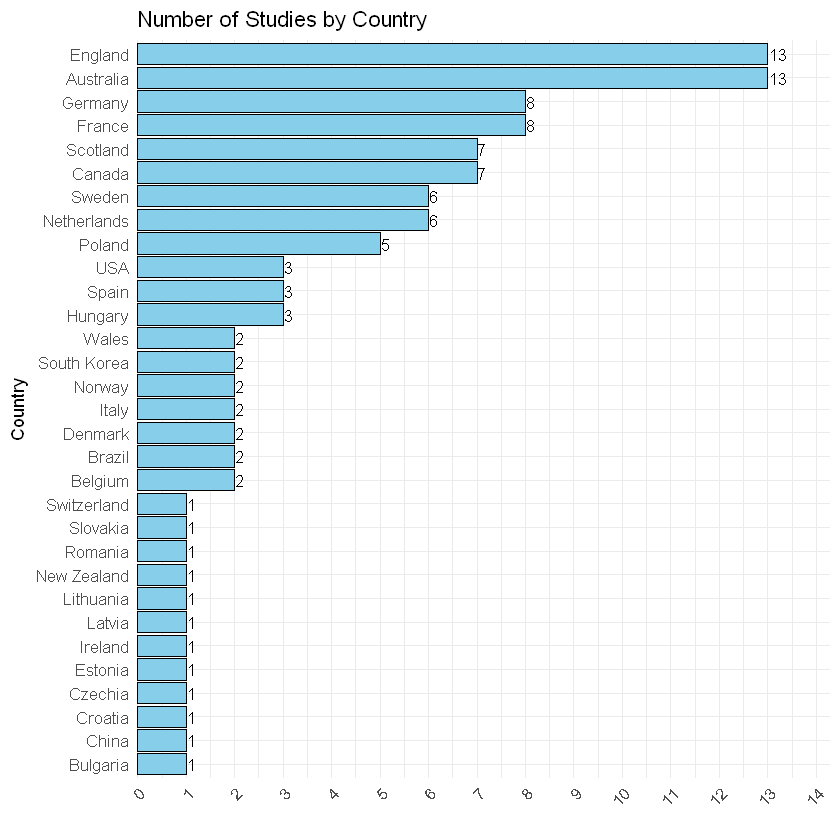

In [68]:
ggplot(Country_Counts, aes(x = reorder(Countries, Counts), y = Counts)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_text(aes(label = Counts), 
            hjust = -0.1,        # Adjust label position
            size = 3.5,          # Adjust text size
            color = "black") +   # Text color
  theme_minimal() +
  labs(title = "Number of Studies by Country",
       x = "Country",
       y = "") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 10)) +
  scale_y_continuous(breaks = seq(0, max(Country_Counts$Counts, na.rm = TRUE) + 1, 1), 
                     expand = expansion(mult = c(0, 0.1))) +  # Expand space for labels
  coord_flip()  #Flip for better readability

In [69]:
# Read a specific sheet (replace "Sheet1" with the exact sheet name if different)
Type_of_Source_Counts <- read_excel(file_path, sheet = "Type of Source Counts")  # Replace "Sheet1" with your actual sheet name

#View the first few rows of the data
Type_of_Source_Counts

Type of Dataset Used,Counts
<chr>,<dbl>
Sampling from HTA database,19
Entire HTA database,19
HTA database specific product/category,10


In [70]:
ggplot(Type_of_Source_Counts, aes(x = reorder(stringr::str_wrap(`Type of Dataset Used`, width = 20), Counts), y = Counts)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_text(aes(label = Counts), 
            vjust = -0.5,        # Adjust label position for vertical bars
            size = 3.5, 
            color = "black") +
  theme_minimal() +
  labs(title = "Number of Studies by Type of Dataset Used",
       x = "",
       y = "Number of Studies") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5),  # Center the labels
        axis.text.y = element_text(size = 10)) +
  scale_y_continuous(breaks = seq(0, max(Type_of_Source_Counts$Counts, na.rm = TRUE) + 5, 5), 
                     expand = expansion(mult = c(0, 0.1)))


ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `loadNamespace()`:
! there is no package called 'stringr'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj

In [71]:
# Read a specific sheet (replace "Sheet1" with the exact sheet name if different)
Stat_Methods_Counts <- read_excel(file_path, sheet = "Stat Methods Counts")  # Replace "Sheet1" with your actual sheet name

#View the first few rows of the data
Stat_Methods_Counts

Statistical Methods/ML Algorithms,Counts
<chr>,<dbl>
Regression,43
Advanced Machine Learning,2
"Classical statistics (t-test, Chi-Square)",3


In [72]:
ggplot(Stat_Methods_Counts, aes(x = reorder(stringr::str_wrap(`Statistical Methods/ML Algorithms`, width = 20), Counts), y = Counts)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_text(aes(label = Counts), 
            vjust = -0.3, 
            size = 3.5, 
            color = "black") +
  theme_minimal() +
  labs(
    title = "Number of Studies by Statistical Method/ML Algorithm",
    x = "",
    y = "Number of Studies"
  ) +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 0.5),  # Set angle to 0 for proper wrapping
    axis.text.y = element_text(size = 10)
  ) +
  scale_y_continuous(
    breaks = seq(0, max(Stat_Methods_Counts$Counts, na.rm = TRUE) + 5, 5),
    expand = expansion(mult = c(0, 0.1))
  )


ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `loadNamespace()`:
! there is no package called 'stringr'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj

In [73]:
# Read a specific sheet (replace "Sheet1" with the exact sheet name if different)
Stat_Methods_Counts <- read_excel(file_path, sheet = "Study Objective Counts")  # Replace "Sheet1" with your actual sheet name

#View the first few rows of the data
Stat_Methods_Counts

Study Objective,Counts
<chr>,<dbl>
HTA Drivers,42
Prediction Model for HTA Decision,3
Comparison of HTA bodies,5


In [74]:
ggplot(Stat_Methods_Counts, aes(x = reorder(stringr::str_wrap(`Study Objective`, width = 20), Counts), y = Counts)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_text(aes(label = Counts), 
            vjust = -0.3, 
            size = 3.5, 
            color = "black") +
  theme_minimal() +
  labs(
    title = "Number of Studies by Study Objective",
    x = "",
    y = "Number of Studies"
  ) +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 0.5),  # Set angle to 0 for proper wrapping
    axis.text.y = element_text(size = 10)
  ) +
  scale_y_continuous(
    breaks = seq(0, max(Stat_Methods_Counts$Counts, na.rm = TRUE) + 5, 5),
    expand = expansion(mult = c(0, 0.1))
  )

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `loadNamespace()`:
! there is no package called 'stringr'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj

In [75]:

# Read a specific sheet (replace "Sheet1" with the exact sheet name if different)
Years_Counts <- read_excel(file_path, sheet = "Years Counts")  # Replace "Sheet1" with your actual sheet name

#View the first few rows of the data
Years_Counts

Years,Counts
<dbl>,<dbl>
2006,2
2007,0
2008,1
2009,0
2010,1
2011,0
2012,2
2013,4
2014,3


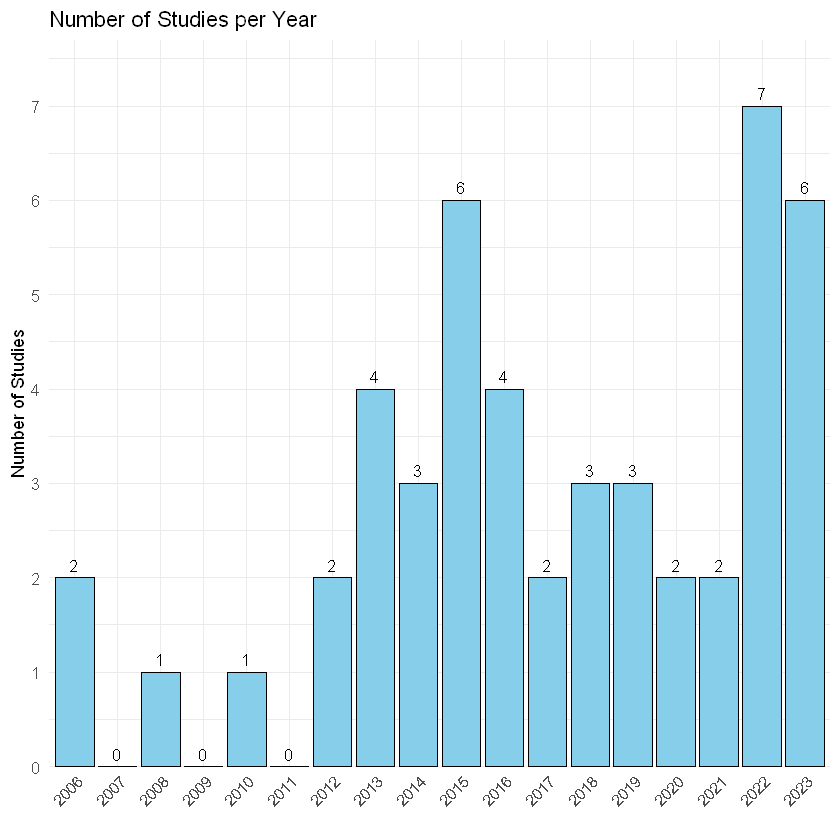

In [76]:
ggplot(Years_Counts, aes(x = factor(Years), y = Counts)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_text(aes(label = Counts), 
            vjust = -0.5,        # Position labels above bars
            size = 3.5,          # Text size
            color = "black") +   # Text color
  theme_minimal() +
  labs(title = "Number of Studies per Year",
       x = "",
       y = "Number of Studies") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 10)) +
  scale_y_continuous(breaks = seq(0, max(Years_Counts$Counts, na.rm = TRUE) + 1, 1), 
                     expand = expansion(mult = c(0, 0.1)))  # Ticks every 1 unit
